# 1. Reading and Understanding the data

Importing necessary libraries

In [569]:
import numpy as np
import pandas as pd
#Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# importing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import collections;
%matplotlib inline
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

Loading the Data

In [570]:
bike = pd.read_csv('day.csv',parse_dates=True)

bike.shape
bike.describe()
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0        1  01-01-2018       1   0     1        0        6           0           2  14.110847   
1        2  02-01-2018       1   0     1        0        0           0           2  14.902598   
2        3  03-01-2018       1   0     1        0        1           1           1   8.050924   
3        4  04-01-2018       1   0     1        0        2           1           1   8.200000   
4        5  05-01-2018       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [571]:
bike.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [572]:
# Dropping the instant columns
bike.drop('instant', axis=1, inplace=True)

By Verifying the data above it is evident that we dont have any null values in the data set

In [573]:
bike.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [574]:
# Converting dteday to timestamp
bike['dteday'] = pd.to_datetime(bike['dteday'], format='%d-%m-%Y')
bike.set_index('dteday', inplace=True)

In [575]:
bike.describe()

season          yr        mnth     holiday     weekday  workingday  weathersit  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562    1.394521   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405    0.544807   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000    1.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000    1.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000    2.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000    3.000000   

             temp       atemp         hum   windspeed       casual   registered          cnt  
count  730.000000  730.000000  730.000000  730.000000   730.000000   730.000000   730.000000  
mean    20.319259   23.726322   62.765175   12.763620   849.249315  3658.757534  4508.006849  
std      7.506729    8.150308   14.237589    5.195841   686.479875  1559.758728  1936.011647  
min      2.424346    3.953480    0.000000    1.500244     2.000000    20.000000    22.000000  
25%     13.811885   16.889713   52.000000    9.041650   316.250000  2502.250000  3169.750000  
50%     20.465826   24.368225   62.625000   12.125325   717.000000  3664.500000  4548.500000  
75%     26.880615   30.445775   72.989575   15.625589  1096.500000  4783.250000  5966.000000  
max     35.328347   42.044800   97.250000   34.000021  3410.000000  6946.000000  8714.000000

##Converting the ordinal data into categories




In [576]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [577]:
bike['season'].unique()

array([1, 2, 3, 4])

In [578]:
bike['season']=bike['season'].replace({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [579]:
bike['mnth']=bike['mnth'].replace({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug',
                                  9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

In [580]:
bike['weathersit'] = bike['weathersit'].replace({1:'Clear', 2:'Mist & Cloudy', 3:'Light Snow & Rain', 4:'Heavy Snow & Rain'})

In [581]:
bike['weekday'] = bike['weekday'].replace({0:'Tues', 1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun',6:'Mon'})


In [582]:
bike.head()


season  yr mnth  holiday weekday  workingday     weathersit       temp     atemp  \
dteday                                                                                         
2018-01-01  spring   0  Jan        0     Mon           0  Mist & Cloudy  14.110847  18.18125   
2018-01-02  spring   0  Jan        0    Tues           0  Mist & Cloudy  14.902598  17.68695   
2018-01-03  spring   0  Jan        0     Wed           1          Clear   8.050924   9.47025   
2018-01-04  spring   0  Jan        0   Thurs           1          Clear   8.200000  10.60610   
2018-01-05  spring   0  Jan        0     Fri           1          Clear   9.305237  11.46350   

                hum  windspeed  casual  registered   cnt  
dteday                                                    
2018-01-01  80.5833  10.749882     331         654   985  
2018-01-02  69.6087  16.652113     131         670   801  
2018-01-03  43.7273  16.636703     120        1229  1349  
2018-01-04  59.0435  10.739832     108        1454  1562  
2018-01-05  43.6957  12.522300      82        1518  1600

In [583]:
bike['yr'].unique()

array([0, 1])

In [584]:
bike['mnth'].unique()

array(['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec'], dtype=object)

In [585]:
bike['holiday'].unique()

array([0, 1])

In [586]:
bike['weekday'].unique()

array(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], dtype=object)

In [587]:
bike['workingday'].unique()

array([0, 1])

In [588]:
bike['weathersit'].unique()

array(['Mist & Cloudy', 'Clear', 'Light Snow & Rain'], dtype=object)

In [589]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [590]:
bike.describe()

yr     holiday  workingday        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   12.763620   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589    5.195841   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000    9.041650   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Visualising the Data
If there's evident multicollinearity, this is the first point where we'll detect it. We'll also identify whether any predictors have a strong direct association with the outcome variable. To achieve this, we'll visualize our data using Matplotlib and Seaborn.

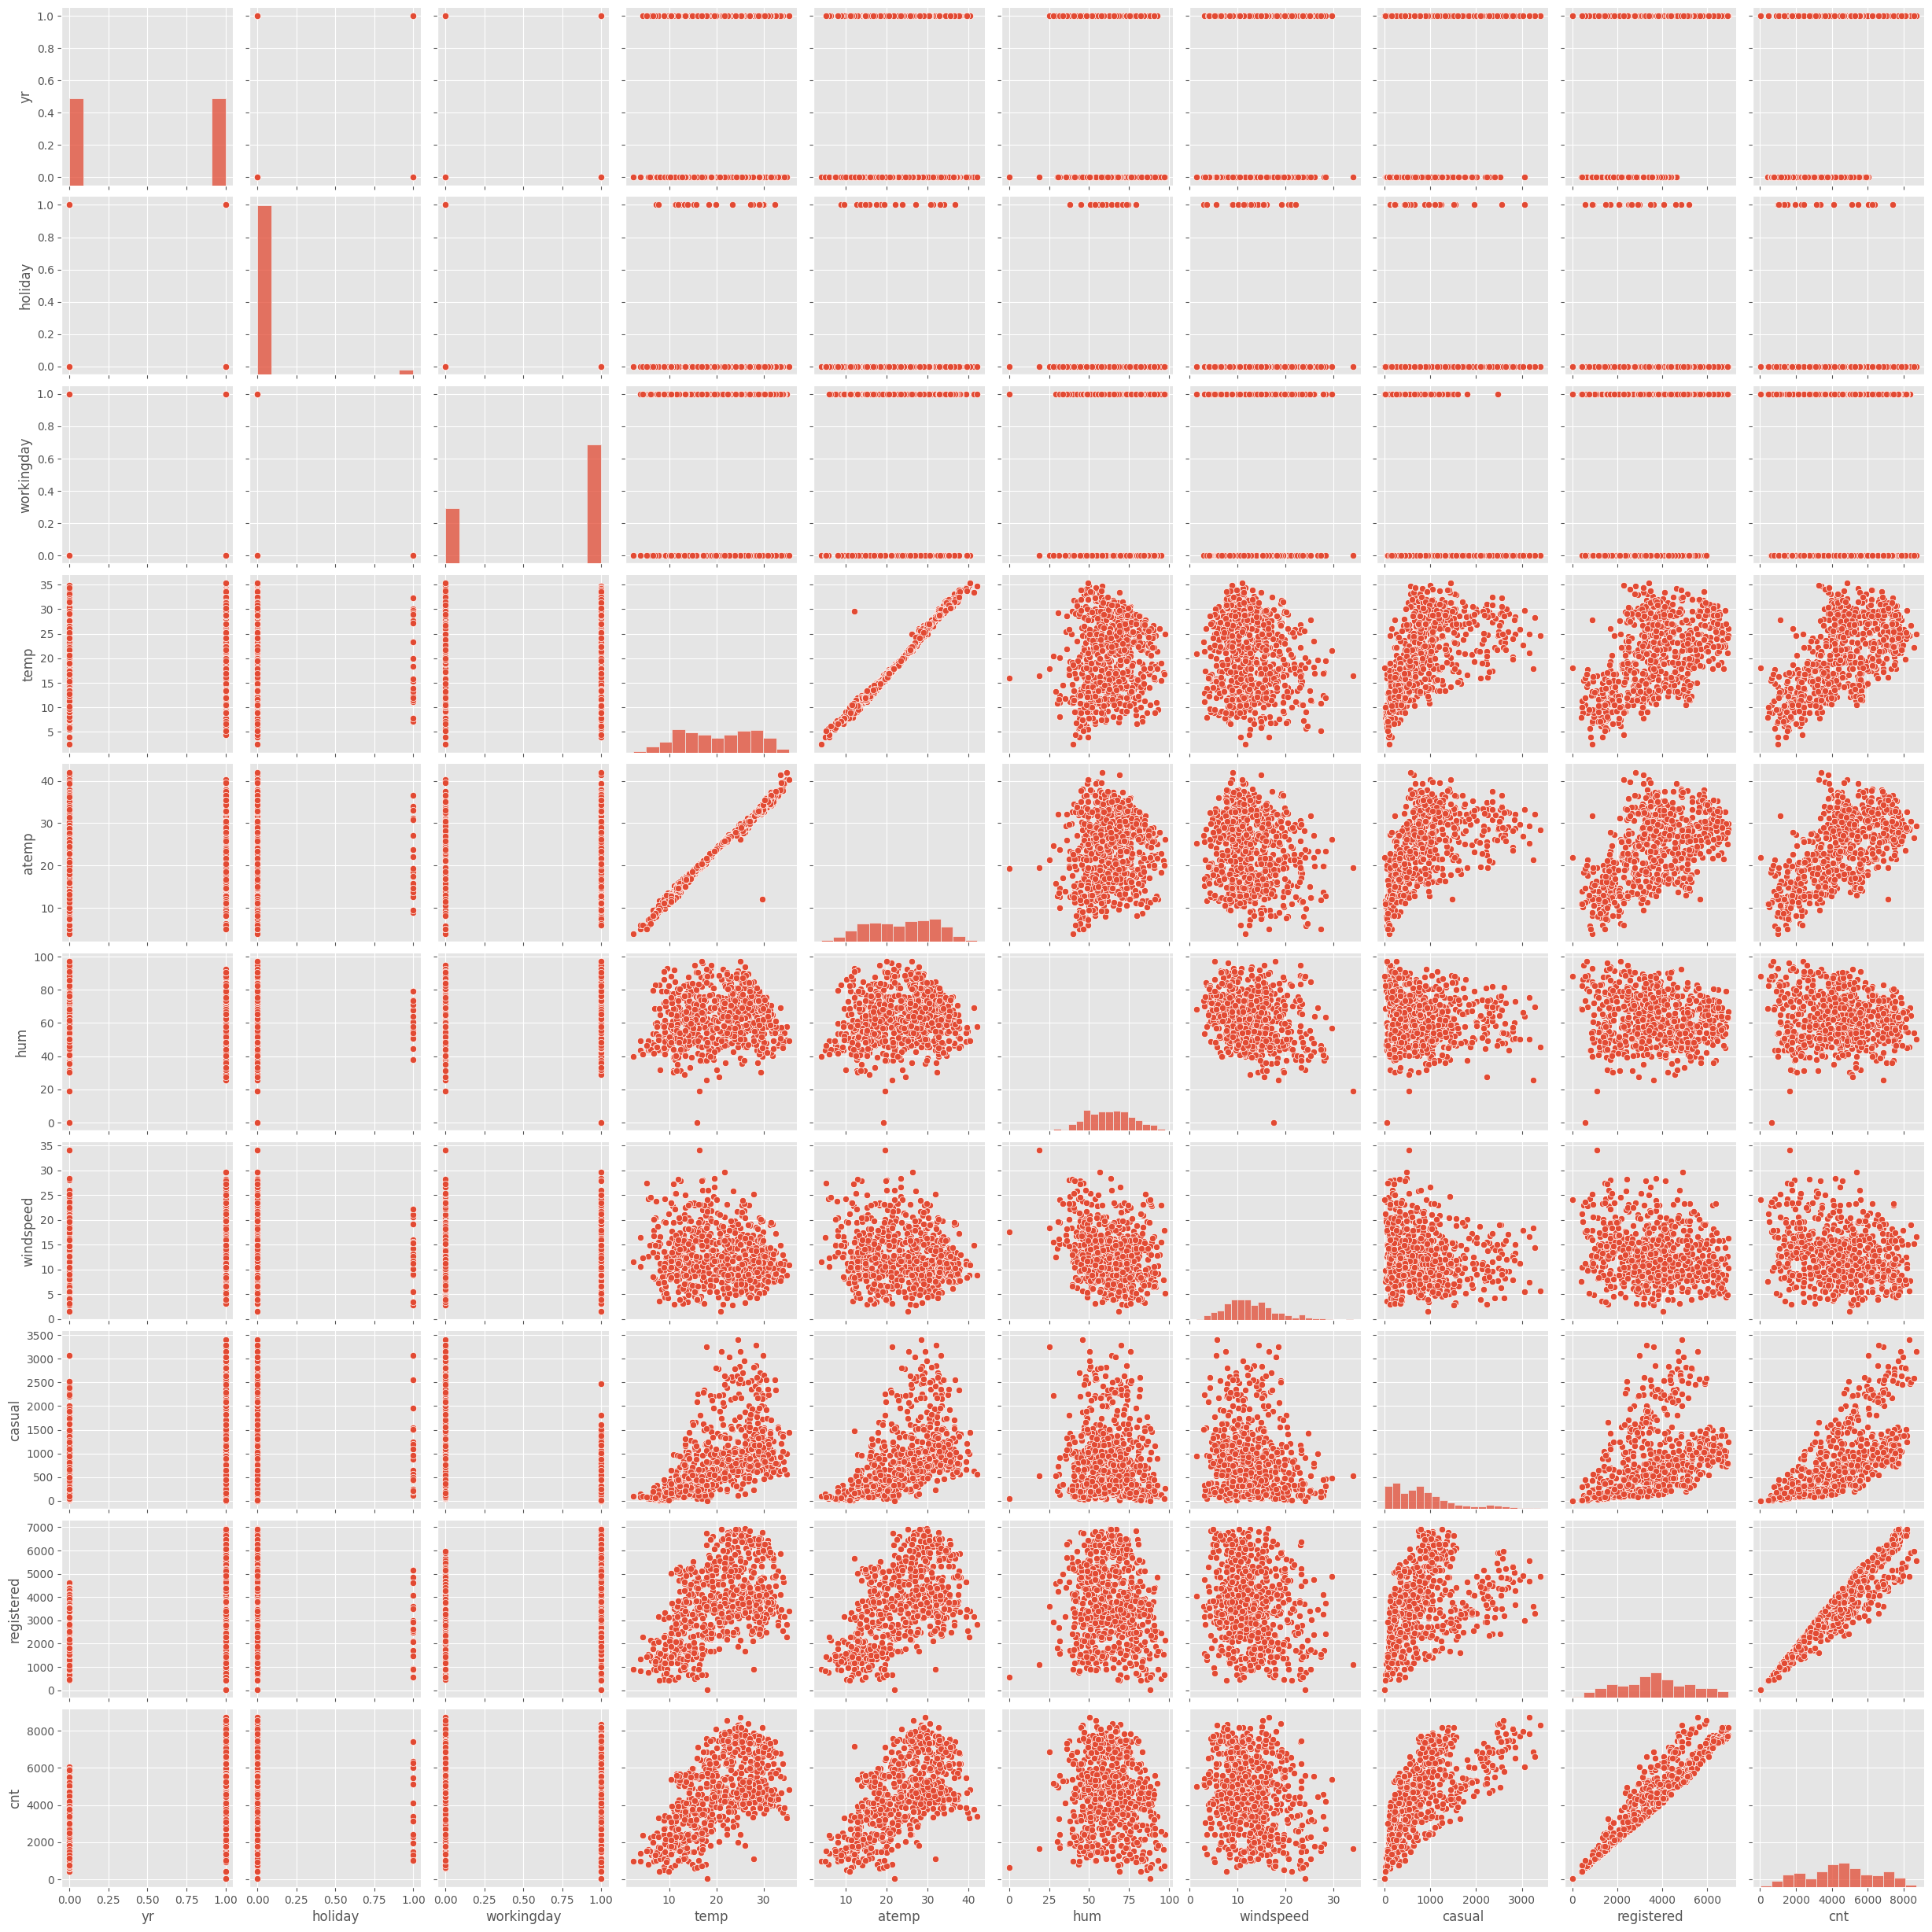

In [591]:
plt.style.use("ggplot")

sns.pairplot(bike, height=2.5)
plt.show()

Temp and aTemp appear to be almost identical, not only when compared to other variables but also logically—since "feels like" temperature (aTemp) will generally rise or fall in tandem with the actual temperature (Temp). Given this strong correlation, we'll drop the aTemp variable to avoid redundancy in the analysis.


In [592]:
bike.drop(["atemp"], axis=1, inplace=True)

In [593]:
# Classifying variables into different categories
continuous = ['temp','hum', 'windspeed']
categorical = ['yr', 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target = ['casual','registered']

#Visualising Categorical Variables

In [594]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 79.8+ KB


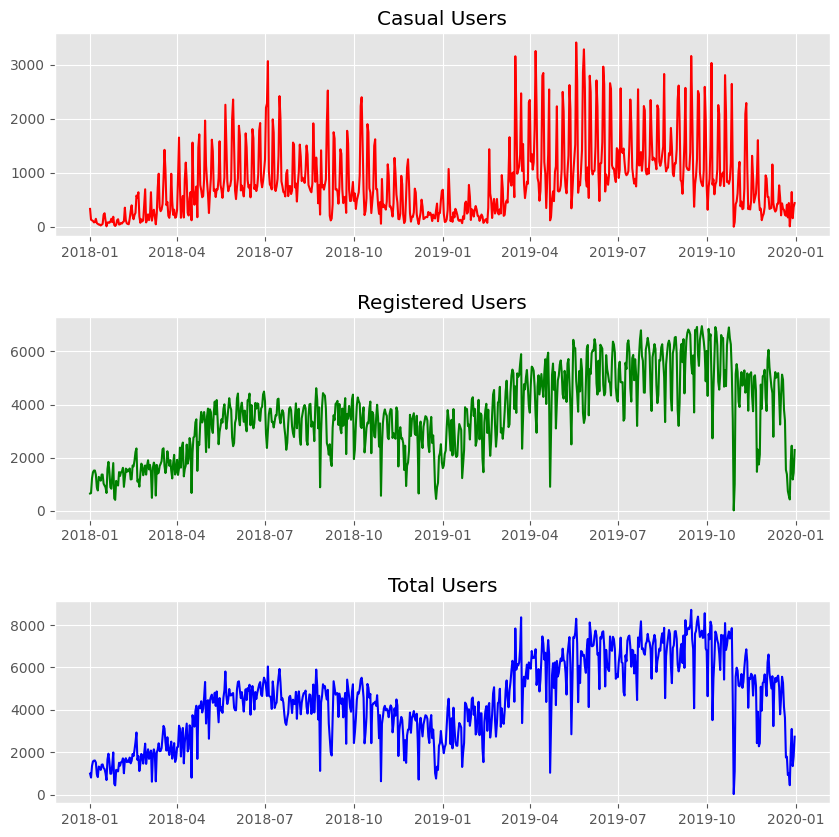

In [595]:
bike.sort_index(inplace=True)
fig, ax = plt.subplots(3,1, figsize=[10,10])
plt.subplots_adjust(hspace=.4)
ax[0].plot(bike['casual'], color ='r')
ax[1].plot(bike['registered'], color = 'g')
ax[2].plot(bike['cnt'], color='b')
ax[0].set_title('Casual Users')
ax[1].set_title('Registered Users')
ax[2].set_title('Total Users')
plt.show()

* Registered users shows significant increase in 2019 while casual users do not.


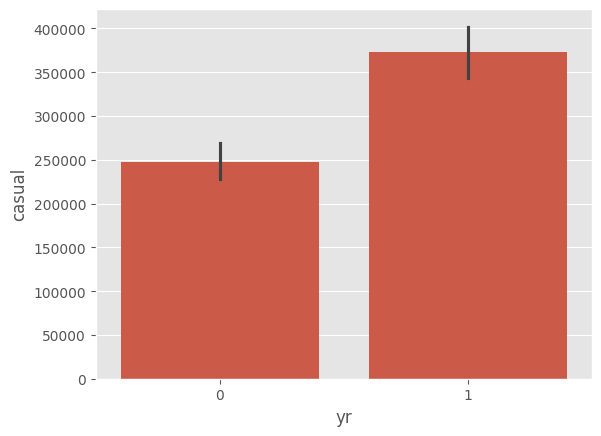

Average Users per day : 
yr
0     677.40274
1    1021.09589
dtype: float64


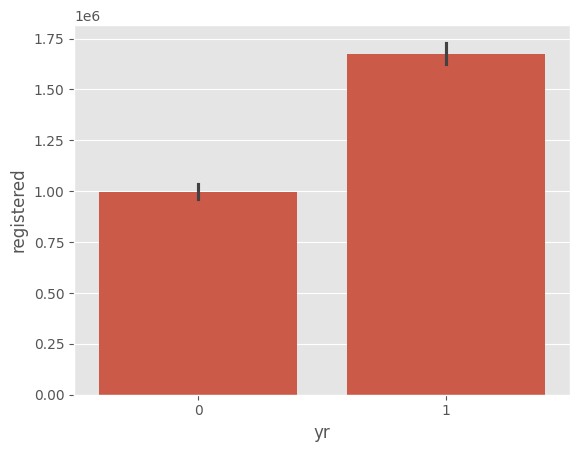

Average Users per day : 
yr
0    2728.358904
1    4589.156164
dtype: float64


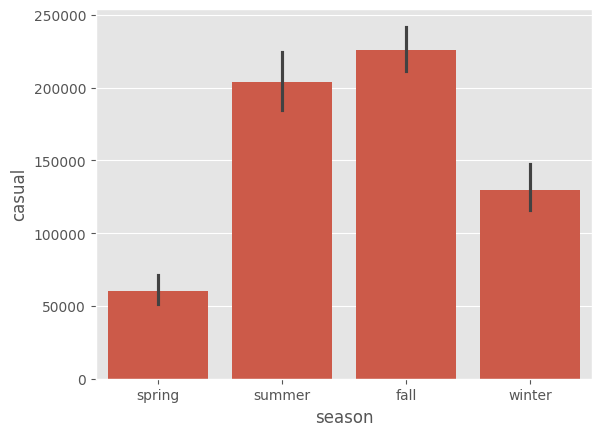

Average Users per day : 
season
fall      1202.611702
spring     336.427778
summer    1106.097826
winter     729.112360
dtype: float64


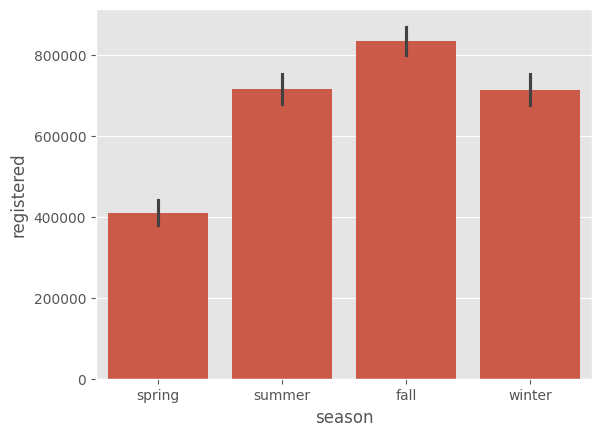

Average Users per day : 
season
fall      4441.691489
spring    2271.983333
summer    3886.233696
winter    3999.050562
dtype: float64


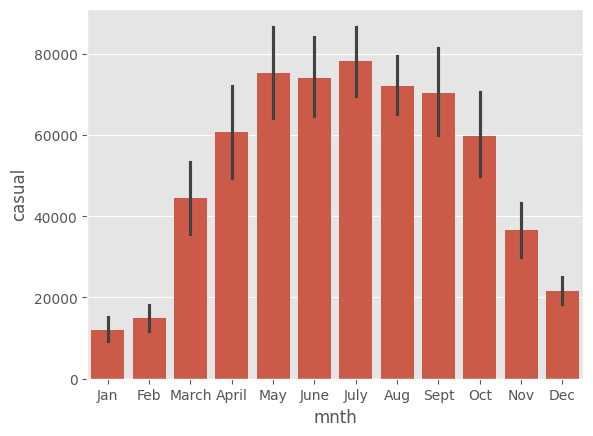

Average Users per day : 
mnth
April    1013.366667
Aug      1161.919355
Dec       349.887097
Feb       266.035714
Jan       194.225806
July     1260.596774
June     1231.766667
March     716.838710
May      1214.274194
Nov       610.050000
Oct       963.870968
Sept     1172.050000
dtype: float64


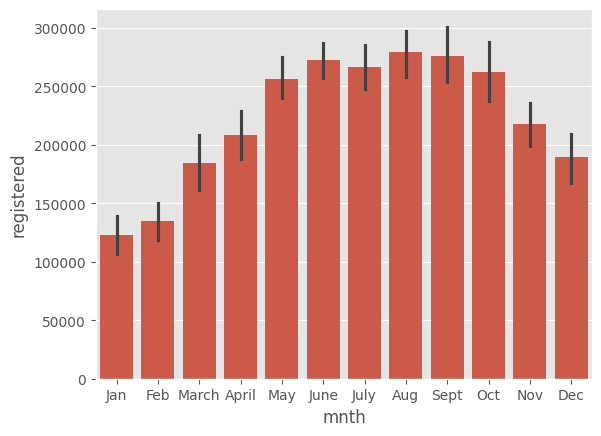

Average Users per day : 
mnth
April    3471.533333
Aug      4502.500000
Dec      3053.919355
Feb      2403.928571
Jan      1982.112903
July     4303.080645
June     4540.600000
March    2975.419355
May      4135.500000
Nov      3637.133333
Oct      4235.354839
Sept     4594.466667
dtype: float64


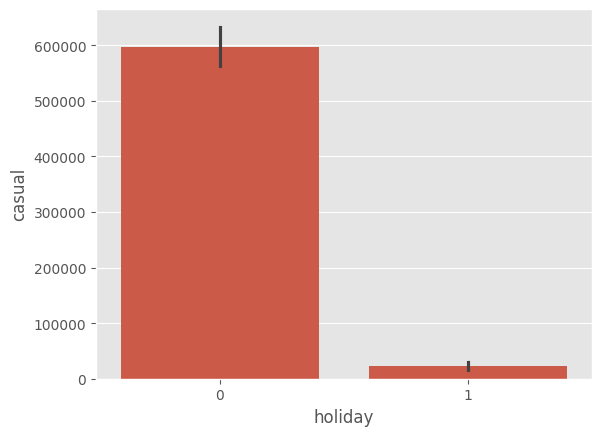

Average Users per day : 
holiday
0     842.867419
1    1064.714286
dtype: float64


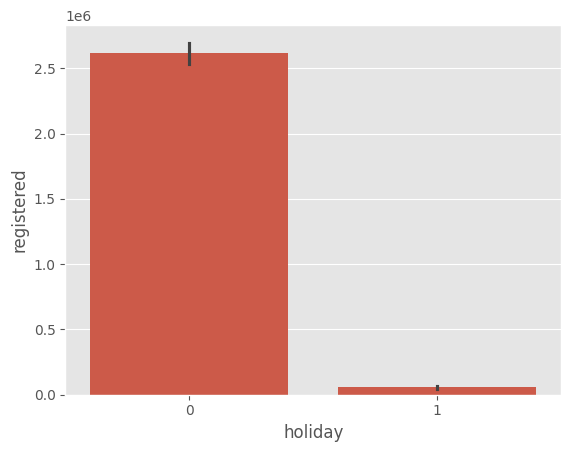

Average Users per day : 
holiday
0    3688.035261
1    2670.285714
dtype: float64


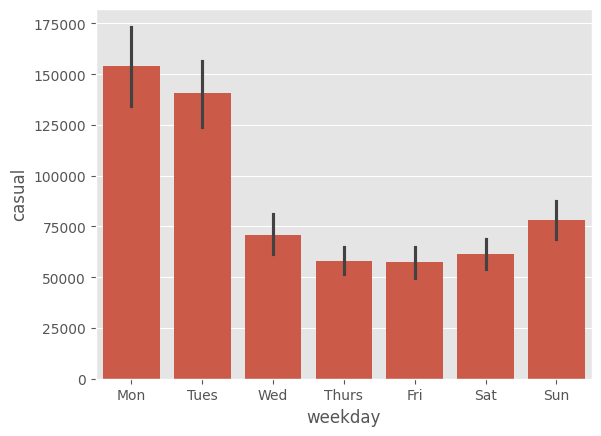

Average Users per day : 
weekday
Fri       555.864078
Mon      1465.257143
Sat       590.961538
Sun       752.288462
Thurs     556.182692
Tues     1338.295238
Wed       674.133333
dtype: float64


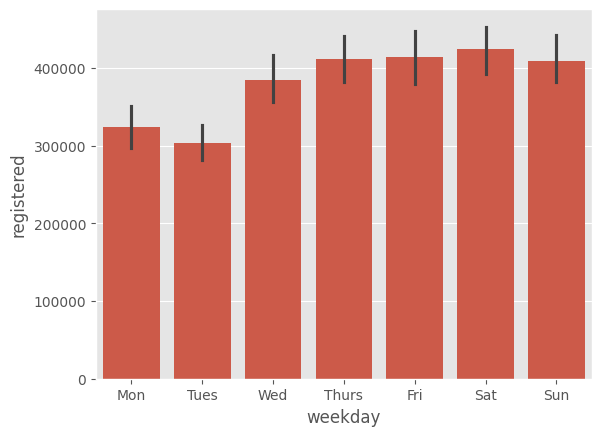

Average Users per day : 
weekday
Fri      4019.029126
Mon      3085.285714
Sat      4076.298077
Sun      3938.000000
Thurs    3954.480769
Tues     2890.533333
Wed      3663.990476
dtype: float64


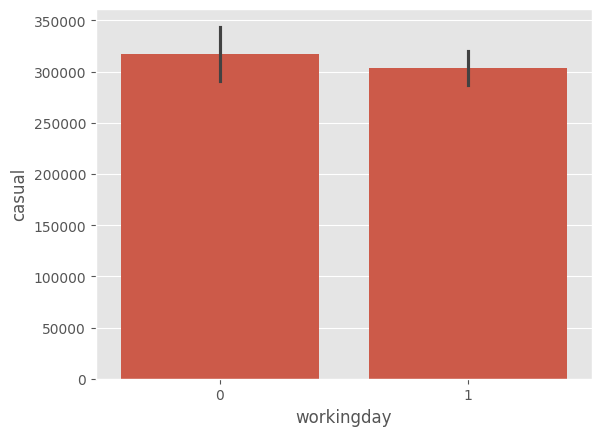

Average Users per day : 
workingday
0    1371.134199
1     607.655311
dtype: float64


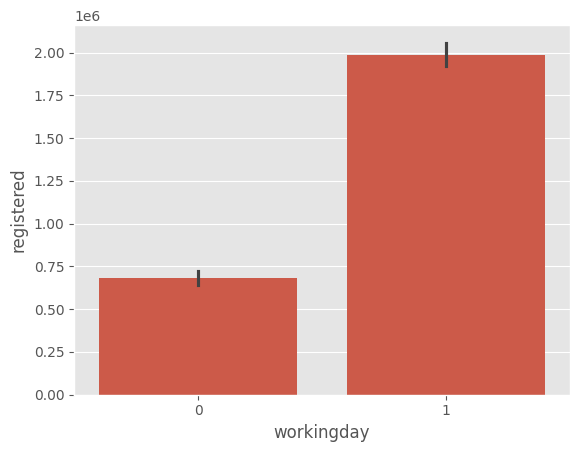

Average Users per day : 
workingday
0    2959.034632
1    3982.677355
dtype: float64


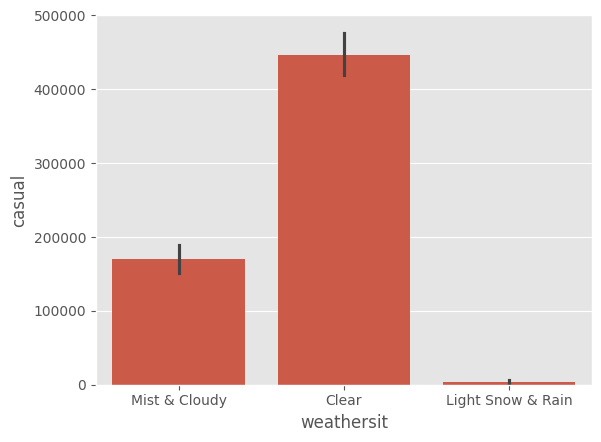

Average Users per day : 
weathersit
Clear                964.030238
Light Snow & Rain    185.476190
Mist & Cloudy        689.882114
dtype: float64


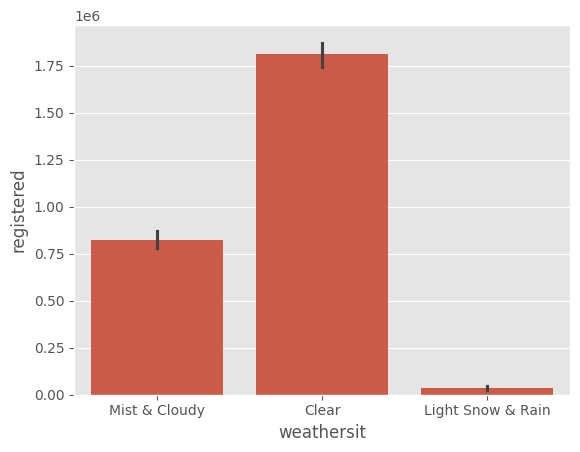

Average Users per day : 
weathersit
Clear                3912.755940
Light Snow & Rain    1617.809524
Mist & Cloudy        3354.930894
dtype: float64


In [596]:
for i in categorical:
    for j in Target:
        sns.barplot(x=bike[i], y=bike[j], estimator=sum)
        plt.show()
        print("Average Users per day : ")
        print(bike.groupby(i)[j].sum()/bike[i].value_counts())

* Insights
1. Growth Rate of casual users over 1st to 2nd year is 50% while for registered users its 65% approx.
2. Registered Users tend to use the bike service more consistently through every month than casual.
3. During Holidays, avg no of casual users is higher than registered users
4. Casual users are using bike service majorily on weekends while registered users are using consistently.
5. For casual users, Bike usage on non-workday is more while for registered users they are using it more on working days
6. Weather analysis is almost same for both users as bad weather decreasing the no. of users.

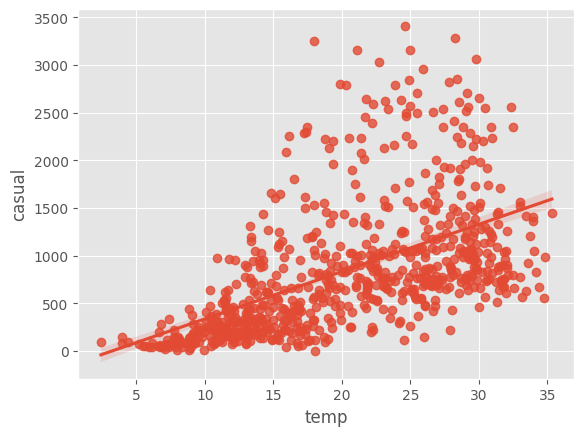

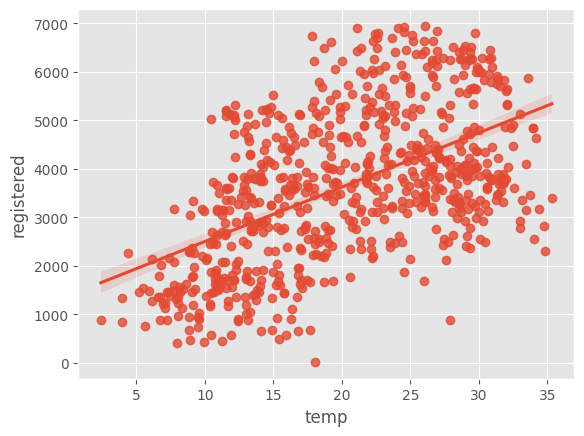

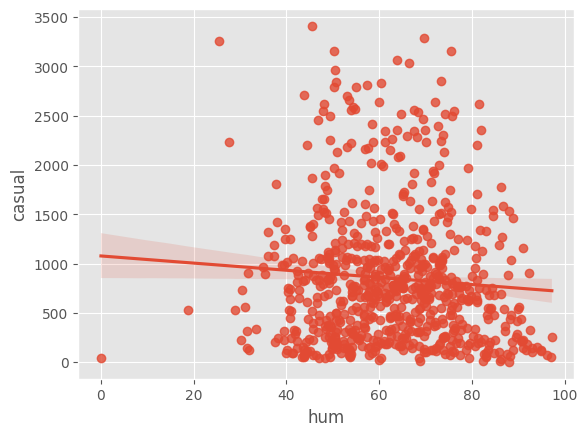

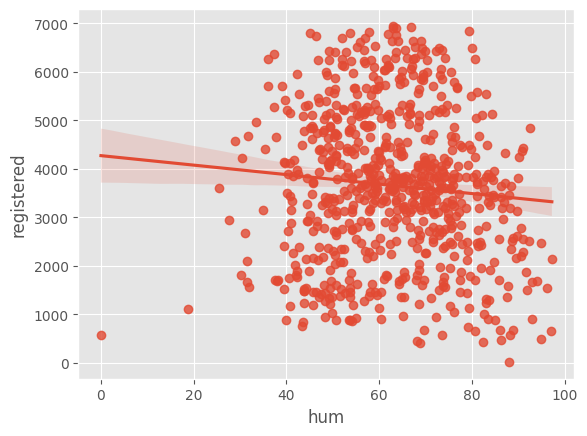

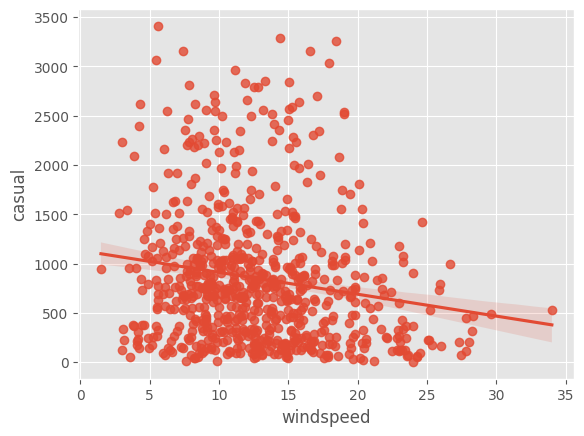

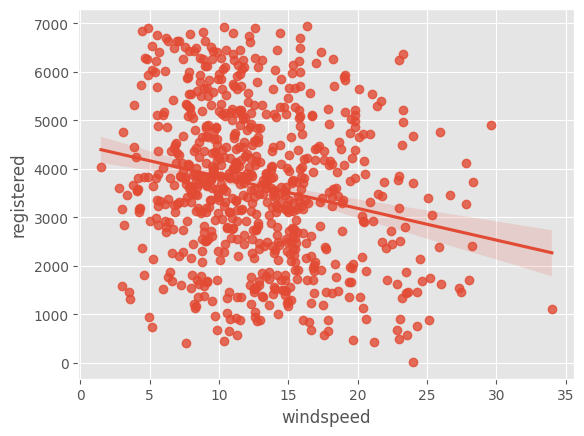

In [597]:
for i in continuous:
    for j in Target:
        sns.regplot(x=i, y=j, data=bike)
        plt.show()

* Insights-
-- Casual users are avoiding using bike services when temp are low while medium temp shows highest users.
-- Registered users shows consistent behaviour.
-- Humidity almost shows no relation with no. of casual and registered users.
-- There's a slight negative relation with windspeed.

-0.05718748619696199 -1.118305215576041


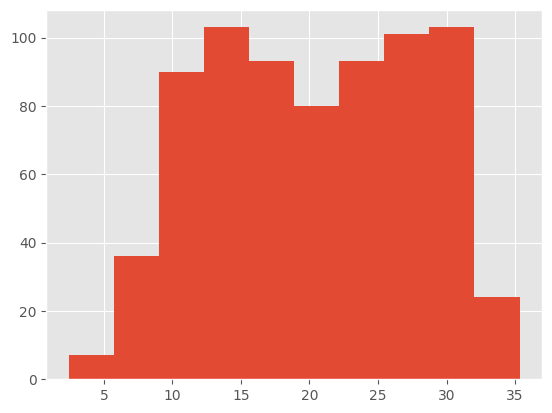

-0.06747586253218554 -0.05983007379843652


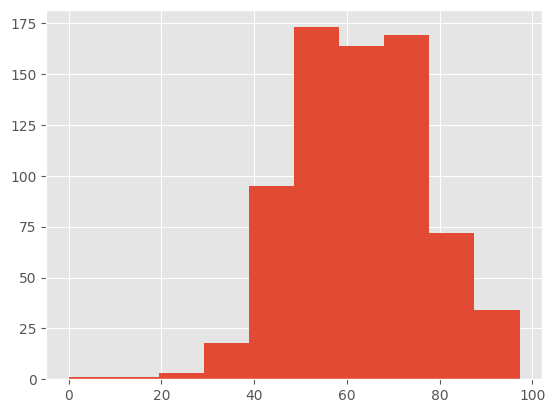

0.6763140387852972 0.4059090481131822


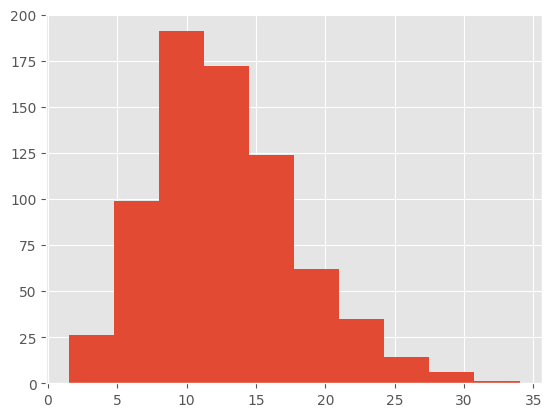

In [598]:
for i in continuous:
    plt.hist(bike[i], )
    print(bike[i].skew(), bike[i].kurtosis())
    plt.show()

* Skewness and Kurtosis are in acceptable range

In [599]:
# removing casual and registered as they imply to cnt
bike.drop(['casual','registered'], axis=1, inplace=True)

## Predicting total users

In [600]:
categorical

['yr', 'season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

<Axes: xlabel='weathersit', ylabel='cnt'>

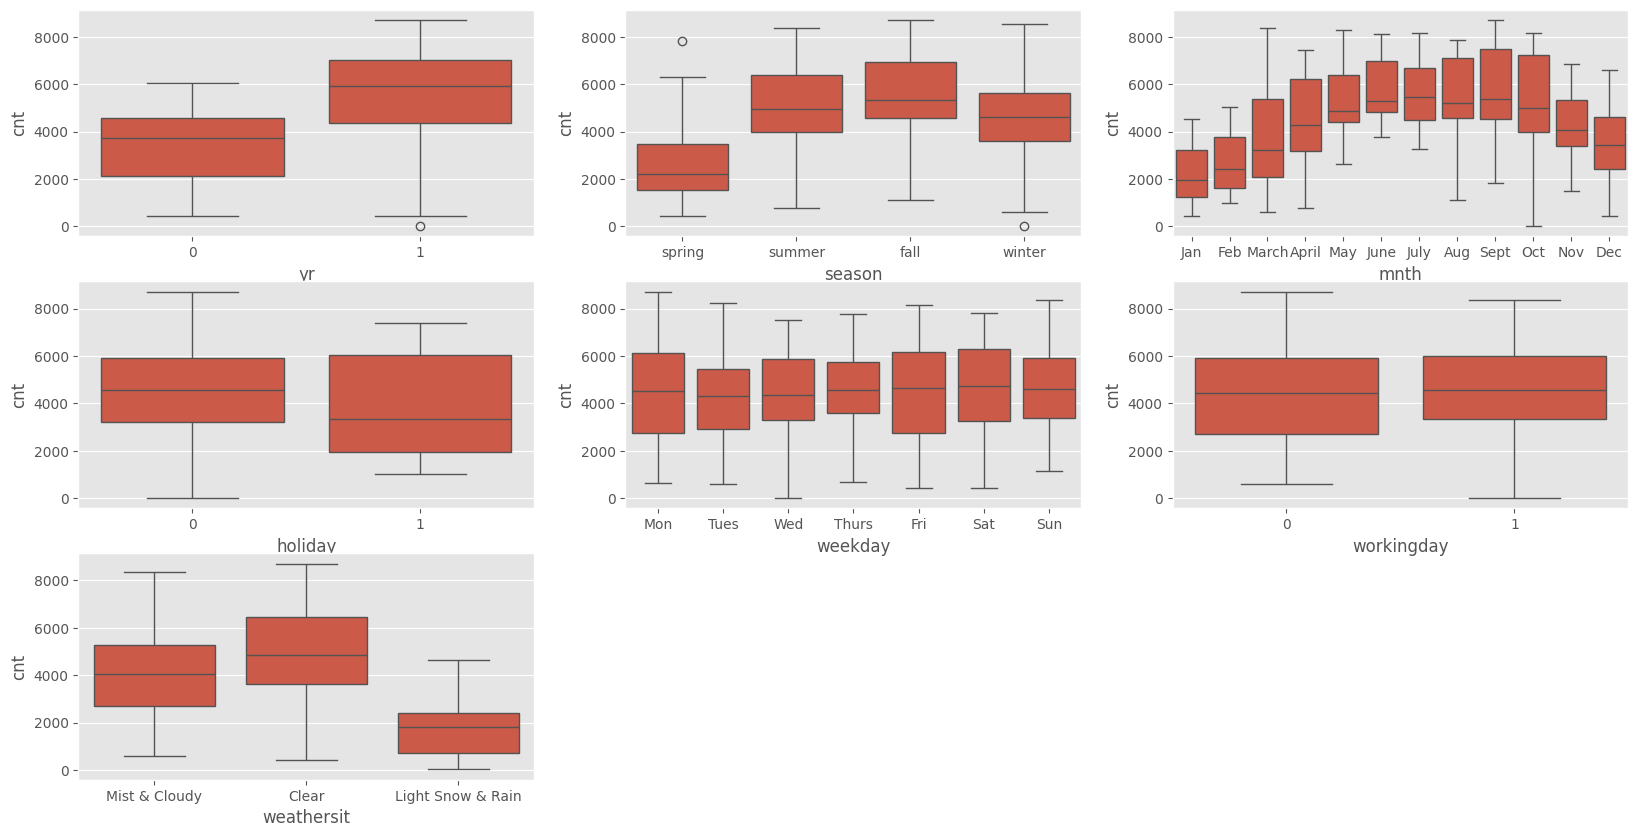

In [601]:
plt.figure(figsize=[20,10])
plt.subplot(3,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data=bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'season', y = 'cnt', data=bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data=bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data=bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data=bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data=bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data=bike)

Data Transformation, feature Selection, data splitting and Linear Regression modelling

In [602]:
bike.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp      hum  \
dteday                                                                                        
2018-01-01  spring   0  Jan        0     Mon           0  Mist & Cloudy  14.110847  80.5833   
2018-01-02  spring   0  Jan        0    Tues           0  Mist & Cloudy  14.902598  69.6087   
2018-01-03  spring   0  Jan        0     Wed           1          Clear   8.050924  43.7273   
2018-01-04  spring   0  Jan        0   Thurs           1          Clear   8.200000  59.0435   
2018-01-05  spring   0  Jan        0     Fri           1          Clear   9.305237  43.6957   

            windspeed   cnt  
dteday                       
2018-01-01  10.749882   985  
2018-01-02  16.652113   801  
2018-01-03  16.636703  1349  
2018-01-04  10.739832  1562  
2018-01-05  12.522300  1600

## Dummy variables

The variable season and weathersit has 4 levels. We need to convert these levels into integer as well.

For this, we will use something called dummy variables.

In [603]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 68.4+ KB


In [604]:
bike.head()

season  yr mnth  holiday weekday  workingday     weathersit       temp      hum  \
dteday                                                                                        
2018-01-01  spring   0  Jan        0     Mon           0  Mist & Cloudy  14.110847  80.5833   
2018-01-02  spring   0  Jan        0    Tues           0  Mist & Cloudy  14.902598  69.6087   
2018-01-03  spring   0  Jan        0     Wed           1          Clear   8.050924  43.7273   
2018-01-04  spring   0  Jan        0   Thurs           1          Clear   8.200000  59.0435   
2018-01-05  spring   0  Jan        0     Fri           1          Clear   9.305237  43.6957   

            windspeed   cnt  
dteday                       
2018-01-01  10.749882   985  
2018-01-02  16.652113   801  
2018-01-03  16.636703  1349  
2018-01-04  10.739832  1562  
2018-01-05  12.522300  1600

In [605]:
bike1.weathersit.unique()

array(['Mist & Cloudy', 'Clear', 'Light Snow & Rain'], dtype=object)

In [606]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 68.4+ KB


In [607]:
# Create dummy variables and drop first variable and
season_dummy = pd.get_dummies(bike['season'], drop_first = True).astype(int)
weathersit_dummy = pd.get_dummies(bike['weathersit'], drop_first = True).astype(int)
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first = True).astype(int)
month_dummy = pd.get_dummies(bike['mnth'], drop_first = True).astype(int)

In [608]:
season_dummy.head()

spring  summer  winter
dteday                            
2018-01-01       1       0       0
2018-01-02       1       0       0
2018-01-03       1       0       0
2018-01-04       1       0       0
2018-01-05       1       0       0

In [609]:
weathersit_dummy.head()

Light Snow & Rain  Mist & Cloudy
dteday                                      
2018-01-01                  0              1
2018-01-02                  0              1
2018-01-03                  0              0
2018-01-04                  0              0
2018-01-05                  0              0

In [610]:
weekday_dummy.head()

Mon  Sat  Sun  Thurs  Tues  Wed
dteday                                     
2018-01-01    1    0    0      0     0    0
2018-01-02    0    0    0      0     1    0
2018-01-03    0    0    0      0     0    1
2018-01-04    0    0    0      1     0    0
2018-01-05    0    0    0      0     0    0

In [611]:
month_dummy.head()

Aug  Dec  Feb  Jan  July  June  March  May  Nov  Oct  Sept
dteday                                                                
2018-01-01    0    0    0    1     0     0      0    0    0    0     0
2018-01-02    0    0    0    1     0     0      0    0    0    0     0
2018-01-03    0    0    0    1     0     0      0    0    0    0     0
2018-01-04    0    0    0    1     0     0      0    0    0    0     0
2018-01-05    0    0    0    1     0     0      0    0    0    0     0

* so now for the row "spring", "summer", "winter" all as 0 will be having "fall" as season
* And "lightRain" and "mistCloud" as 0 then its "clear" as weathersit, and as concluded above its never heavy rain
* And for weekdays if all are 0 then its "Fri"
* And for months if all are 0 then its "Apr"

In [612]:
# Add the results to the original dataframe
bike = pd.concat([bike, season_dummy, weathersit_dummy, weekday_dummy, month_dummy], axis = 1)

In [613]:
# dropping the columns
bike.drop(['season', 'weathersit', 'weekday','mnth'], axis = 1, inplace = True)


In [614]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-01 to 2019-12-31
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   yr                 730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   cnt                730 non-null    int64  
 7   spring             730 non-null    int64  
 8   summer             730 non-null    int64  
 9   winter             730 non-null    int64  
 10  Light Snow & Rain  730 non-null    int64  
 11  Mist & Cloudy      730 non-null    int64  
 12  Mon                730 non-null    int64  
 13  Sat                730 non-null    int64  
 14  Sun                730 non-null    int64  
 15  Thurs              730 non-null    int64  
 16  Tues   

In [615]:
bike.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  summer  winter  \
dteday                                                                                             
2018-01-01   0        0           0  14.110847  80.5833  10.749882   985       1       0       0   
2018-01-02   0        0           0  14.902598  69.6087  16.652113   801       1       0       0   
2018-01-03   0        0           1   8.050924  43.7273  16.636703  1349       1       0       0   
2018-01-04   0        0           1   8.200000  59.0435  10.739832  1562       1       0       0   
2018-01-05   0        0           1   9.305237  43.6957  12.522300  1600       1       0       0   

            Light Snow & Rain  Mist & Cloudy  Mon  Sat  Sun  Thurs  Tues  Wed  Aug  Dec  Feb  Jan  \
dteday                                                                                              
2018-01-01                  0              1    1    0    0      0     0    0    0    0    0    1   
2018-01-02                  0              1    0    0    0      0     1    0    0    0    0    1   
2018-01-03                  0              0    0    0    0      0     0    1    0    0    0    1   
2018-01-04                  0              0    0    0    0      1     0    0    0    0    0    1   
2018-01-05                  0              0    0    0    0      0     0    0    0    0    0    1   

            July  June  March  May  Nov  Oct  Sept  
dteday                                              
2018-01-01     0     0      0    0    0    0     0  
2018-01-02     0     0      0    0    0    0     0  
2018-01-03     0     0      0    0    0    0     0  
2018-01-04     0     0      0    0    0    0     0  
2018-01-05     0     0      0    0    0    0     0

# Splitting Data into Training and Testing sets


In [616]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features
Here we can see that except for temp,hum,windspeed, all the columns have small integer values. Lets convert other large values by rescaling them using min-max scaling to get comparable scales.

In [617]:
scaler = MinMaxScaler()

In [618]:
# Apply scaler() to all the columns except with boolean values
scaler_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[scaler_vars] = scaler.fit_transform(df_train[scaler_vars])

In [619]:
df_train.head()


yr  holiday  workingday      temp       hum  windspeed       cnt  spring  summer  \
dteday                                                                                         
2019-10-16   1        0           1  0.509887  0.575354   0.300794  0.864243       0       0   
2019-07-31   1        0           1  0.815169  0.725633   0.264686  0.827658       0       0   
2019-03-03   1        0           0  0.442393  0.640189   0.255342  0.465255       1       0   
2019-12-30   1        0           0  0.245101  0.498067   0.663106  0.204096       1       0   
2019-04-28   1        0           0  0.395666  0.504508   0.188475  0.482973       0       1   

            winter  Light Snow & Rain  Mist & Cloudy  Mon  Sat  Sun  Thurs  Tues  Wed  Aug  Dec  \
dteday                                                                                            
2019-10-16       1                  0              0    0    0    0      1     0    0    0    0   
2019-07-31       0                  0              0    0    0    0      1     0    0    0    0   
2019-03-03       0                  0              1    1    0    0      0     0    0    0    0   
2019-12-30       0                  0              0    0    0    0      0     1    0    0    1   
2019-04-28       0                  0              1    1    0    0      0     0    0    0    0   

            Feb  Jan  July  June  March  May  Nov  Oct  Sept  
dteday                                                        
2019-10-16    0    0     0     0      0    0    0    1     0  
2019-07-31    0    0     1     0      0    0    0    0     0  
2019-03-03    0    0     0     0      1    0    0    0     0  
2019-12-30    0    0     0     0      0    0    0    0     0  
2019-04-28    0    0     0     0      0    0    0    0     0

In [620]:

df_train.describe()

yr     holiday  workingday        temp         hum   windspeed         cnt  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.650369    0.320768    0.513620   
std      0.500429    0.157763    0.468282    0.225844    0.145882    0.169797    0.224593   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179    0.356420   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763    0.518638   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447    0.684710   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           spring      summer     winter  Light Snow & Rain  Mist & Cloudy         Mon  \
count  510.000000  510.000000  510.00000         510.000000     510.000000  510.000000   
mean     0.243137    0.245098    0.24902           0.029412       0.343137    0.154902   
std      0.429398    0.430568    0.43287           0.169124       0.475223    0.362166   
min      0.000000    0.000000    0.00000           0.000000       0.000000    0.000000   
25%      0.000000    0.000000    0.00000           0.000000       0.000000    0.000000   
50%      0.000000    0.000000    0.00000           0.000000       0.000000    0.000000   
75%      0.000000    0.000000    0.00000           0.000000       1.000000    0.000000   
max      1.000000    1.000000    1.00000           1.000000       1.000000    1.000000   

              Sat         Sun       Thurs        Tues         Wed         Aug         Dec  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.133333    0.127451    0.131373    0.143137    0.150980    0.096078    0.084314   
std      0.340268    0.333805    0.338139    0.350557    0.358381    0.294988    0.278131   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Feb         Jan        July        June       March         May         Nov  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.066667    0.088235    0.076471    0.074510    0.098039    0.084314    0.086275   
std      0.249689    0.283915    0.266010    0.262857    0.297660    0.278131    0.281045   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Oct        Sept  
count  510.000000  510.000000  
mean     0.086275    0.080392  
std      0.281045    0.272166  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    0.000000  
max      1.000000    1.000000

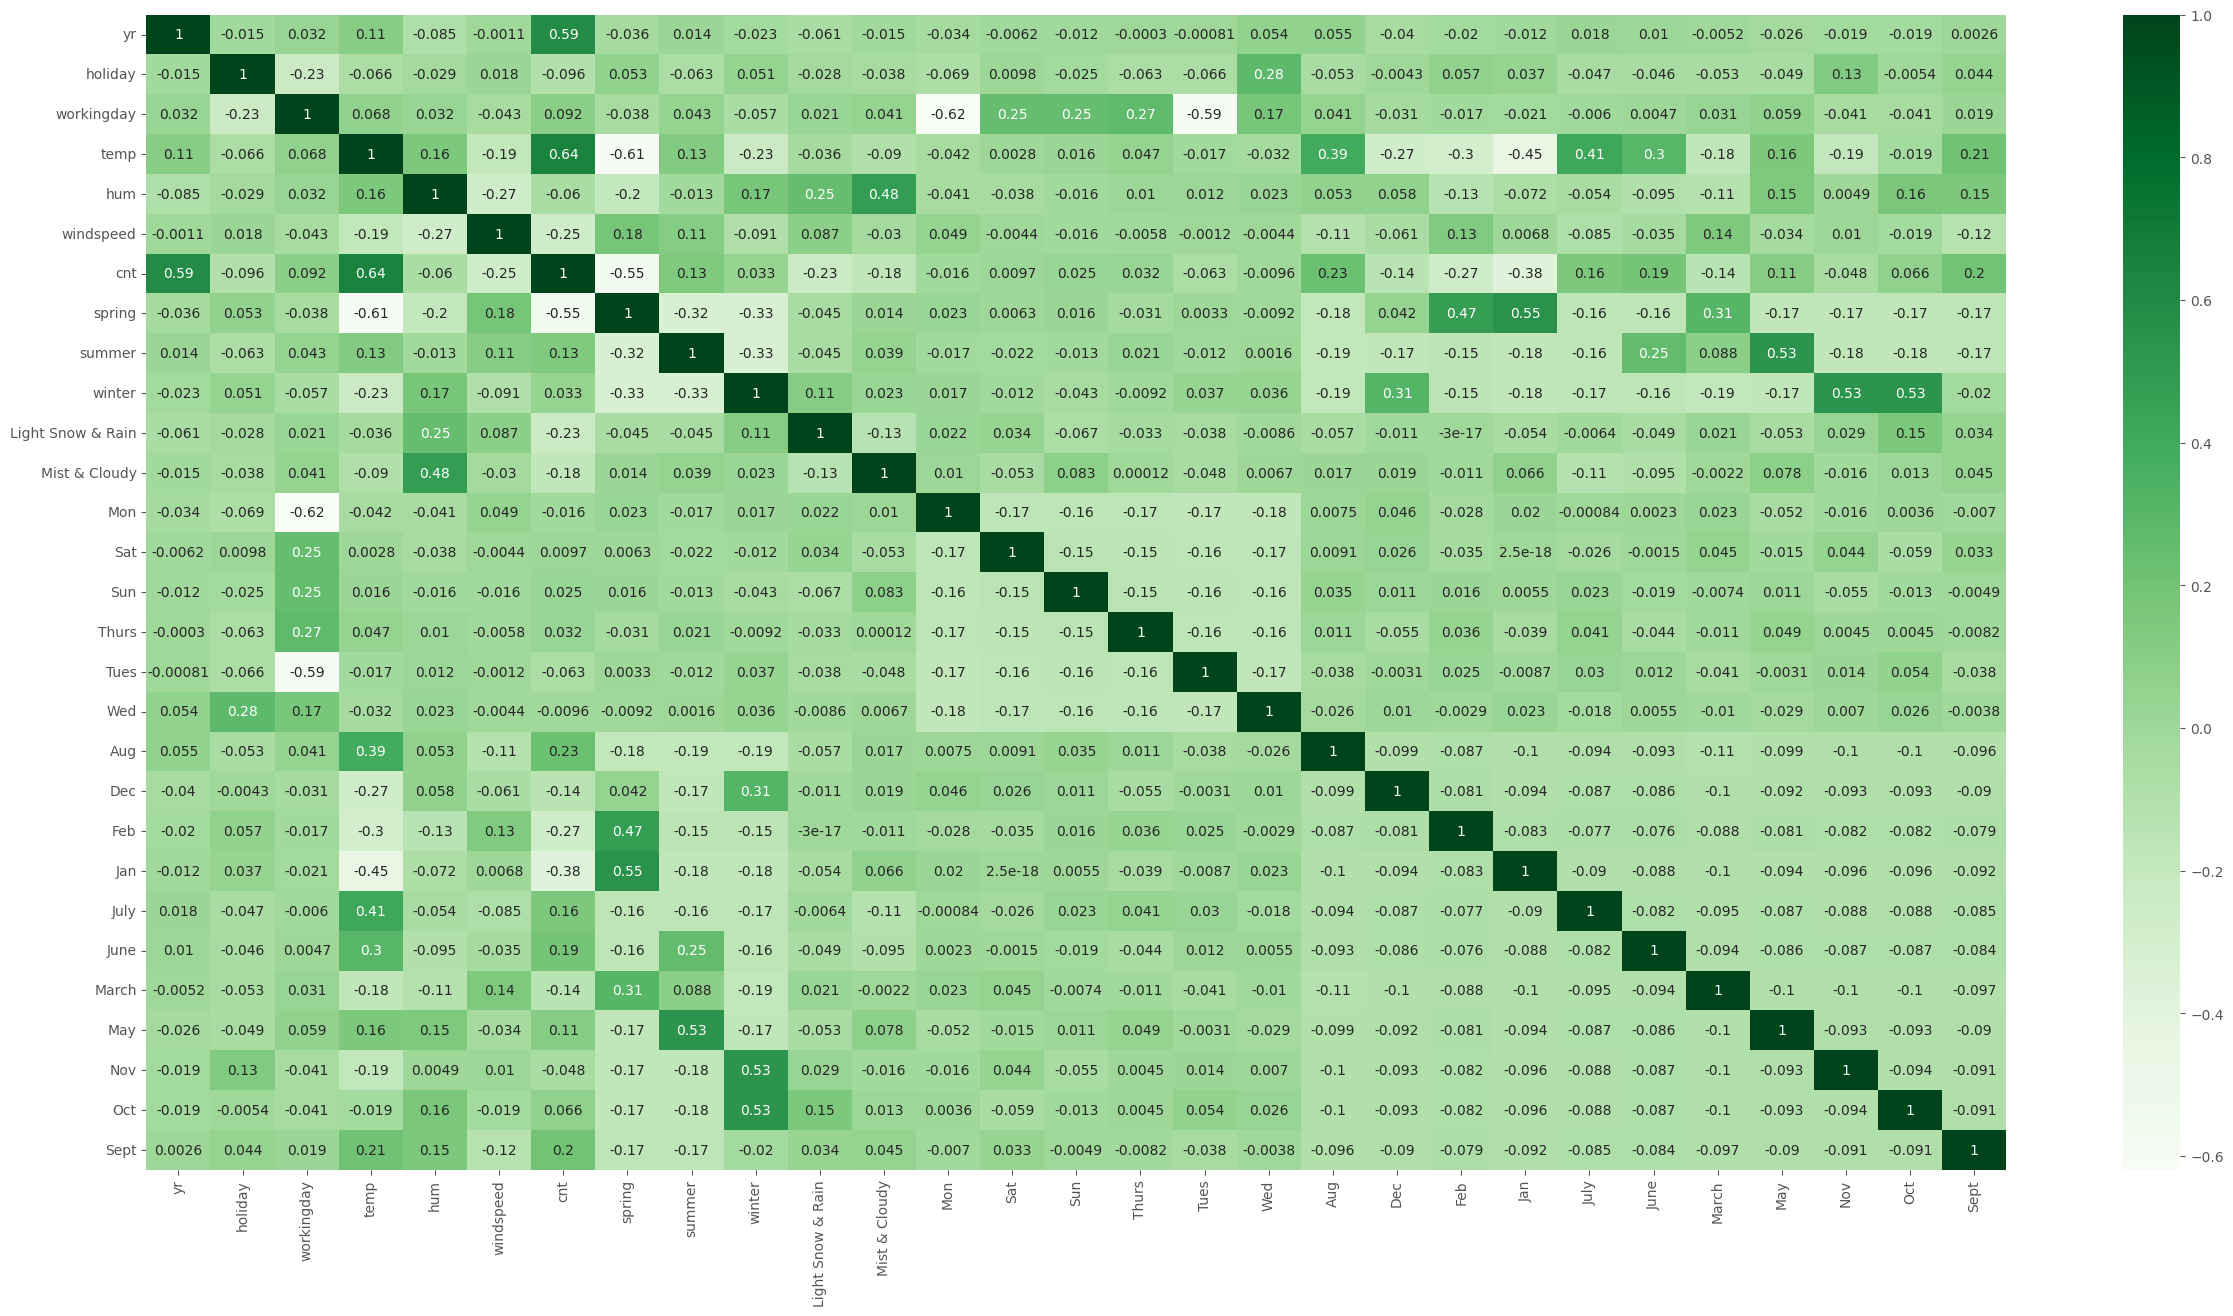

In [621]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(),cmap = "Greens", annot=True)
plt.show()

Pair plot of "cnt" and "temp", as we are picking temp as the first variable as its correlation is 0.63


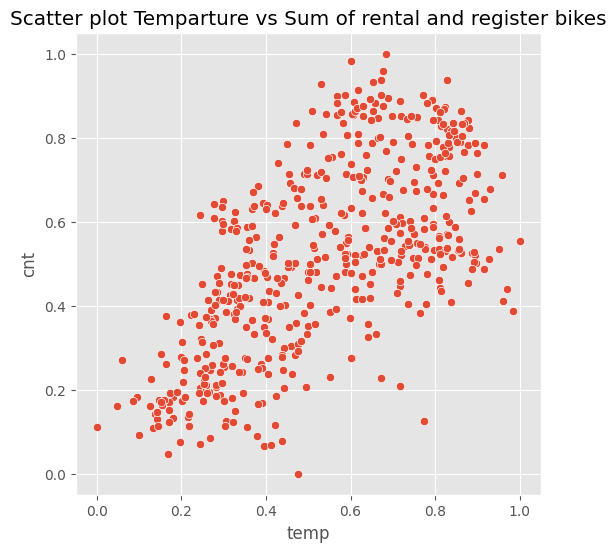

In [622]:
plt.figure(figsize=[6,6])
sns.scatterplot(x="temp", y="cnt", data=df_train)
plt.title('Scatter plot Temparture vs Sum of rental and register bikes')

plt.show()

#Building Model


In [623]:
#Dividing into X and Y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [624]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  spring  summer  winter  \
dteday                                                                                       
2019-10-16   1        0           1  0.509887  0.575354   0.300794       0       0       1   
2019-07-31   1        0           1  0.815169  0.725633   0.264686       0       0       0   
2019-03-03   1        0           0  0.442393  0.640189   0.255342       1       0       0   
2019-12-30   1        0           0  0.245101  0.498067   0.663106       1       0       0   
2019-04-28   1        0           0  0.395666  0.504508   0.188475       0       1       0   

            Light Snow & Rain  Mist & Cloudy  Mon  Sat  Sun  Thurs  Tues  Wed  Aug  Dec  Feb  Jan  \
dteday                                                                                              
2019-10-16                  0              0    0    0    0      1     0    0    0    0    0    0   
2019-07-31                  0              0    0    0    0      1     0    0    0    0    0    0   
2019-03-03                  0              1    1    0    0      0     0    0    0    0    0    0   
2019-12-30                  0              0    0    0    0      0     1    0    0    1    0    0   
2019-04-28                  0              1    1    0    0      0     0    0    0    0    0    0   

            July  June  March  May  Nov  Oct  Sept  
dteday                                              
2019-10-16     0     0      0    0    0    1     0  
2019-07-31     1     0      0    0    0    0     0  
2019-03-03     0     0      1    0    0    0     0  
2019-12-30     0     0      0    0    0    0     0  
2019-04-28     0     0      0    0    0    0     0

###RFE Recursive feature elimination

In [625]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)

# Instantiate RFE with the estimator (lm) and desired number of features (16)
# The parameter 'n_features_to_select' is used to specify the desired number of features.
rfe = RFE(estimator=lm, n_features_to_select=15)
# running RFE
rfe = rfe.fit(X_train, y_train)

In [626]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Snow & Rain', True, 1),
 ('Mist & Cloudy', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 10),
 ('Sun', False, 9),
 ('Thurs', False, 8),
 ('Tues', True, 1),
 ('Wed', False, 7),
 ('Aug', False, 12),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 13),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sept', True, 1)]

In [627]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer', 'winter',
       'Light Snow & Rain', 'Mist & Cloudy', 'Mon', 'Tues', 'July', 'Sept'],
      dtype='object')

In [628]:
X_train.columns[~rfe.support_]

Index(['Sat', 'Sun', 'Thurs', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'March', 'May', 'Nov',
       'Oct'],
      dtype='object')

##Model 1


In [629]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


# Adding a constant variable
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)

In [630]:
lm = sm.OLS(y_train,X_train_rfe).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        17:20:38   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1989      0.028      7.181      0.000       0.144       0.253
yr                    0.2297      0.008     28.660      0.000       0.214       0.245
holiday              -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday            0.0837      0.010      8.672      0.000       0.065       0.103
temp                  0.5278      0.033     15.897      0.000       0.463       0.593
hum                  -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed            -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring               -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer                0.0526      0.015      3.553      0.000       0.024       0.082
winter                0.1003      0.017      5.890      0.000       0.067       0.134
Light Snow & Rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Mist & Cloudy        -0.0578      0.010     -5.559      0.000      -0.078      -0.037
Mon                   0.0937      0.012      8.045      0.000       0.071       0.117
Tues                  0.0405      0.012      3.304      0.001       0.016       0.065
July                 -0.0549      0.018     -3.035      0.003      -0.090      -0.019
Sept                  0.0818      0.016      4.956      0.000       0.049       0.114
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     5.89e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.35e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [631]:
# Droping the const for calculating vif
X_train_new = X_train_rfe.drop(["const"], axis = 1)

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [632]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2          workingday  50.69
11                Mon  12.20
12               Tues  11.79
6              spring   5.02
3                temp   3.62
8              winter   3.49
1             holiday   2.91
7              summer   2.61
4                 hum   1.91
10      Mist & Cloudy   1.57
13               July   1.49
14               Sept   1.30
9   Light Snow & Rain   1.25
5           windspeed   1.20
0                  yr   1.03

In [633]:
# dropping one variable holiday which is having high p value of 0.373
X_train_new = X_train_new.drop(["holiday"], axis = 1)

##Model2

In [634]:
# Adding a constant variable

X_train_new = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.13e-191
Time:                        17:20:38   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1799      0.042      4.276      0.000       0.097       0.263
yr                    0.2297      0.008     28.660      0.000       0.214       0.245
workingday            0.1027      0.025      4.047      0.000       0.053       0.152
temp                  0.5278      0.033     15.897      0.000       0.463       0.593
hum                  -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed            -0.1806      0.025     -7.110      0.000      -0.231      -0.131
spring               -0.0554      0.021     -2.694      0.007      -0.096      -0.015
summer                0.0526      0.015      3.553      0.000       0.024       0.082
winter                0.1003      0.017      5.890      0.000       0.067       0.134
Light Snow & Rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
Mist & Cloudy        -0.0578      0.010     -5.559      0.000      -0.078      -0.037
Mon                   0.1126      0.027      4.202      0.000       0.060       0.165
Tues                  0.0594      0.027      2.206      0.028       0.006       0.112
July                 -0.0549      0.018     -3.035      0.003      -0.090      -0.019
Sept                  0.0818      0.016      4.956      0.000       0.049       0.114
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [635]:
# Dropping the const for calculating vif
X_train_new = X_train_new.drop(["const"], axis = 1)

In [636]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3                 hum  32.14
2                temp  18.98
1          workingday  18.41
10                Mon   4.91
4           windspeed   4.90
5              spring   4.80
11               Tues   4.76
7              winter   3.71
6              summer   3.03
9       Mist & Cloudy   2.31
0                  yr   2.09
12               July   1.60
13               Sept   1.38
8   Light Snow & Rain   1.25

In [637]:
# While all p-values are less than 0.05 where as we have 2 variables with VIF values.
# Now removing high VIF value 32.14 which is for hum
X_train_new = X_train_new.drop(["hum"], axis = 1)

Model 3

In [638]:
# Adding a constant variable

X_train_new = sm.add_constant(X_train_new)

lm_3 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.73e-189
Time:                        17:20:38   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1005      0.038      2.618      0.009       0.025       0.176
yr                    0.2336      0.008     28.839      0.000       0.218       0.250
workingday            0.1034      0.026      4.008      0.000       0.053       0.154
temp                  0.4920      0.033     15.056      0.000       0.428       0.556
windspeed            -0.1491      0.025     -6.032      0.000      -0.198      -0.101
spring               -0.0653      0.021     -3.139      0.002      -0.106      -0.024
summer                0.0465      0.015      3.101      0.002       0.017       0.076
winter                0.0859      0.017      5.058      0.000       0.053       0.119
Light Snow & Rain    -0.2904      0.024    -11.931      0.000      -0.338      -0.243
Mist & Cloudy        -0.0835      0.009     -9.669      0.000      -0.100      -0.067
Mon                   0.1152      0.027      4.225      0.000       0.062       0.169
Tues                  0.0571      0.027      2.085      0.038       0.003       0.111
July                 -0.0500      0.018     -2.723      0.007      -0.086      -0.014
Sept                  0.0758      0.017      4.532      0.000       0.043       0.109
==============================================================================
Omnibus:                       66.977   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.728
Skew:                          -0.681   Prob(JB):                     2.80e-36
Kurtosis:                       5.419   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [639]:
# Dropping the const for calculating vif
X_train_new = X_train_new.drop(["const"], axis = 1)

In [640]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1          workingday  16.19
2                temp  12.73
3           windspeed   4.75
9                 Mon   4.45
10               Tues   4.21
4              spring   3.82
6              winter   2.80
5              summer   2.75
0                  yr   2.07
11               July   1.60
8       Mist & Cloudy   1.58
12               Sept   1.35
7   Light Snow & Rain   1.09

In [641]:
# Since workingday have high VIF value , removing it from the model
X_train_new = X_train_new.drop(["workingday"], axis = 1)

##Model

In [642]:
# Adding a constant variable

X_train_new = sm.add_constant(X_train_new)

lm_5 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.01e-186
Time:                        17:20:38   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2005      0.030      6.771      0.000       0.142       0.259
yr                    0.2341      0.008     28.476      0.000       0.218       0.250
temp                  0.4934      0.033     14.874      0.000       0.428       0.559
windspeed            -0.1513      0.025     -6.031      0.000      -0.201      -0.102
spring               -0.0679      0.021     -3.217      0.001      -0.109      -0.026
summer                0.0469      0.015      3.081      0.002       0.017       0.077
winter                0.0829      0.017      4.818      0.000       0.049       0.117
Light Snow & Rain    -0.2858      0.025    -11.578      0.000      -0.334      -0.237
Mist & Cloudy        -0.0816      0.009     -9.323      0.000      -0.099      -0.064
Mon                   0.0157      0.011      1.371      0.171      -0.007       0.038
Tues                 -0.0422      0.012     -3.562      0.000      -0.066      -0.019
July                 -0.0492      0.019     -2.639      0.009      -0.086      -0.013
Sept                  0.0721      0.017      4.257      0.000       0.039       0.105
==============================================================================
Omnibus:                       80.763   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.920
Skew:                          -0.791   Prob(JB):                     1.58e-46
Kurtosis:                       5.725   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [643]:
X_train_new = X_train_new.drop(["const"], axis = 1)


In [644]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                temp  5.17
2           windspeed  4.62
4              summer  2.23
3              spring  2.11
0                  yr  2.07
5              winter  1.82
10               July  1.59
7       Mist & Cloudy  1.55
11               Sept  1.33
8                 Mon  1.22
9                Tues  1.21
6   Light Snow & Rain  1.08

In [645]:
# Since the p value is singificantly high as 0.171 hence removing Mon.
X_train_new = X_train_new.drop(["Mon"], axis = 1)

## Model

In [646]:
# Adding a constant variable

X_train_new = sm.add_constant(X_train_new)

lm_6 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.65e-187
Time:                        17:20:38   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2036      0.030      6.889      0.000       0.146       0.262
yr                    0.2338      0.008     28.423      0.000       0.218       0.250
temp                  0.4923      0.033     14.832      0.000       0.427       0.557
windspeed            -0.1498      0.025     -5.970      0.000      -0.199      -0.100
spring               -0.0680      0.021     -3.219      0.001      -0.109      -0.026
summer                0.0467      0.015      3.067      0.002       0.017       0.077
winter                0.0831      0.017      4.824      0.000       0.049       0.117
Light Snow & Rain    -0.2856      0.025    -11.560      0.000      -0.334      -0.237
Mist & Cloudy        -0.0816      0.009     -9.311      0.000      -0.099      -0.064
Tues                 -0.0451      0.012     -3.862      0.000      -0.068      -0.022
July                 -0.0486      0.019     -2.607      0.009      -0.085      -0.012
Sept                  0.0721      0.017      4.253      0.000       0.039       0.105
==============================================================================
Omnibus:                       76.151   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.716
Skew:                          -0.733   Prob(JB):                     7.85e-46
Kurtosis:                       5.762   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [647]:
X_train_new = X_train_new.drop(["const"], axis = 1)


In [648]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                temp  5.13
2           windspeed  4.60
4              summer  2.22
3              spring  2.09
0                  yr  2.07
5              winter  1.80
9                July  1.59
7       Mist & Cloudy  1.55
10               Sept  1.33
8                Tues  1.17
6   Light Snow & Rain  1.08

In [649]:
# since July have  high p-value of 0.009.
X_train_new = X_train_new.drop(["July"], axis = 1)

## Model

In [650]:
# Adding a constant variable

X_train_new = sm.add_constant(X_train_new)

lm_7 = sm.OLS(y_train,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.93e-187
Time:                        17:20:38   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     499   BIC:                            -923.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1958      0.030      6.620      0.000       0.138       0.254
yr                    0.2343      0.008     28.332      0.000       0.218       0.251
temp                  0.4799      0.033     14.526      0.000       0.415       0.545
windspeed            -0.1499      0.025     -5.941      0.000      -0.199      -0.100
spring               -0.0570      0.021     -2.737      0.006      -0.098      -0.016
summer                0.0613      0.014      4.300      0.000       0.033       0.089
winter                0.0951      0.017      5.695      0.000       0.062       0.128
Light Snow & Rain    -0.2865      0.025    -11.533      0.000      -0.335      -0.238
Mist & Cloudy        -0.0803      0.009     -9.127      0.000      -0.098      -0.063
Tues                 -0.0462      0.012     -3.940      0.000      -0.069      -0.023
Sept                  0.0853      0.016      5.241      0.000       0.053       0.117
==============================================================================
Omnibus:                       79.757   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.789
Skew:                          -0.775   Prob(JB):                     1.02e-46
Kurtosis:                       5.750   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [651]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          2.93e-187
Time:                        17:20:38   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     499   BIC:                            -923.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1958      0.03

In [652]:
X_train_new = X_train_new.drop(["const"], axis = 1)


In [653]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          windspeed  4.59
1               temp  3.90
0                 yr  2.07
3             spring  2.00
4             summer  1.90
5             winter  1.64
7      Mist & Cloudy  1.54
9               Sept  1.22
8               Tues  1.17
6  Light Snow & Rain  1.08

# Residual Analysis of the train data

In [654]:
# adding constant for x train variable
X_train_new = sm.add_constant(X_train_new)

In [655]:
# Calculating the y train predict values
y_train_cnt_pre = lm_7.predict(X_train_new)

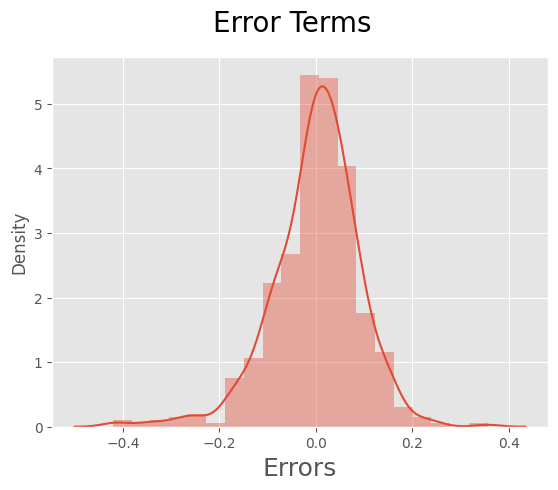

In [656]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt_pre), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Observation : The error terms are normally distributed and the mean of error terms is 0.


In [657]:
residuals = y_train.values-y_train_cnt_pre
mean_residuals = round(np.mean(residuals))
print("Mean_Residuals {}".format(mean_residuals))

Mean_Residuals 0


From the above calculation we can see that Mean is at Zero

Text(0.5, 0, 'Errors')

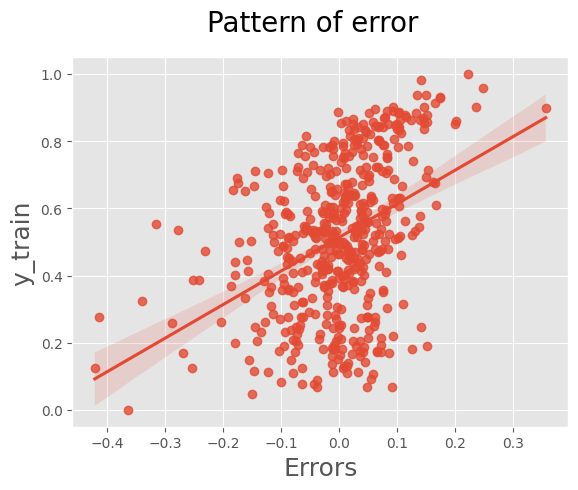

In [658]:
fig = plt.figure()
sns.regplot(x = (y_train - y_train_cnt_pre), y = y_train)
fig.suptitle('Pattern of error', fontsize = 20)                  # Plot heading
plt.ylabel('y_train', fontsize = 18)
plt.xlabel('Errors', fontsize = 18)

Observation: The error terms appear to be independent

Text(0.5, 0, 'Errors')

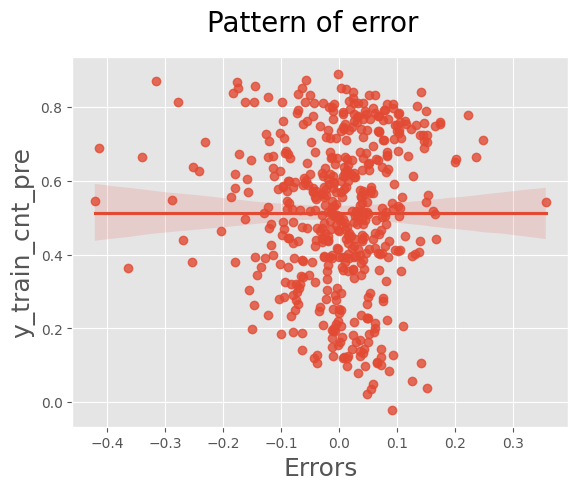

In [659]:
fig = plt.figure()
sns.regplot(x = (y_train - y_train_cnt_pre), y = y_train_cnt_pre)
fig.suptitle('Pattern of error', fontsize = 20)                  # Plot heading
plt.ylabel('y_train_cnt_pre', fontsize = 18)
plt.xlabel('Errors', fontsize = 18)

# Making predictions using the final model

Applying the scaling on the test sets

In [660]:
# Scalling the numerical values
df_test[scaler_vars] = scaler.transform(df_test[scaler_vars])

In [661]:
y_test = df_test.pop('cnt')
X_test = df_test

In [662]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_new.drop('const',axis=1,inplace=True)
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable
X_test_new = sm.add_constant(X_test_new)



# Making predictions
y_pred1 = lm_7.predict(X_test_new)

#Model evaluation

Text(0, 0.5, 'y_pred')

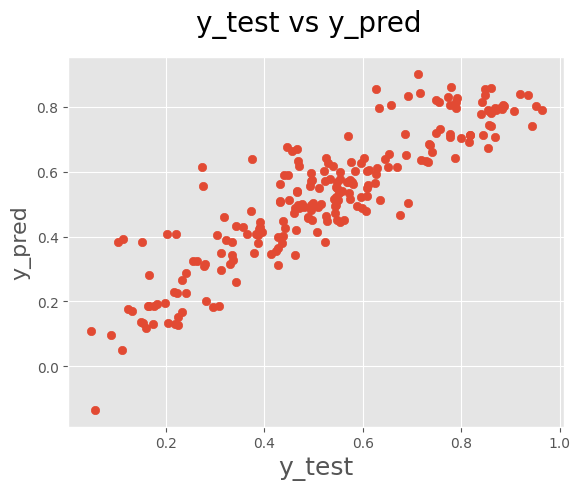

In [663]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred1)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [664]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred1))*100

9.676903935333431

In [665]:
#Calculate the r square for test

r_squared = r2_score(y_true=y_test, y_pred = y_pred1)
r_squared*100

80.28405591555072

###Calclulating adjusted R square for test

In [666]:
# adjusted r suare for test
adj_r_squared_train = 0.830
r_squared_train = 0.834

r = X_test.shape[0]
c = X_test.shape[1]
adj_r_squared_test = 1-(((1-r_squared)*(r-1))/(r-c-1))
adj_r_squared_test*100

77.37854836626346

In [668]:
# difference between r squared of train and test data

round((r_squared_train-r_squared)*100,2)

3.12

In [670]:
# Adjusted r square  diff

round((r_squared_train - adj_r_squared_test),2)*100

6.0

## Common linear Regression model equation

cnt= 0.1958 + 0.2343 × yr + 0.4799 × temp − 0.1499 × windspeed − 0.0570 × spring+ 0.0613 × summer + 0.0951 × winter − 0.2865 × Light Snow & Rain − 0.0803 × Mist & Cloudy − 0.0462 × Tues + 0.0853 × Sept

Significant variables to predict the demand for shared bikes

temp
yr (i.e., 2019)
weathersit (Light Snow & Rain, Mist & Cloudy)
windspeed
Season (Spring, Winter,summer)
months(September)
weekday(Tuesday)

